<img src="./logo_UTN.svg" align="right" width="200" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 9

#### Ana Nuñez



# Consigna

Síntesis de funciones de excitación

1) Sea la función:

    $ Z(s) = \frac{(s2+3)(s2+1)}{s(s2+2)} $

    Se pide hallar la topología circuital y los valores de los componentes para:

    a) Síntesis de Z(s) mediante el método de Foster en su versión  "paralelo" o "derivación".

    b) Idem a) mediante Cauer 1 y 2.

2) Sea 

    $ Y(s) = \frac{3s(s2+7/3)}{(s2+2)(s2+5)} $

    Obtenga los valores de los componentes de la siguiente red sabiendo que L2 y C2 resuenan a 1 r/s.

    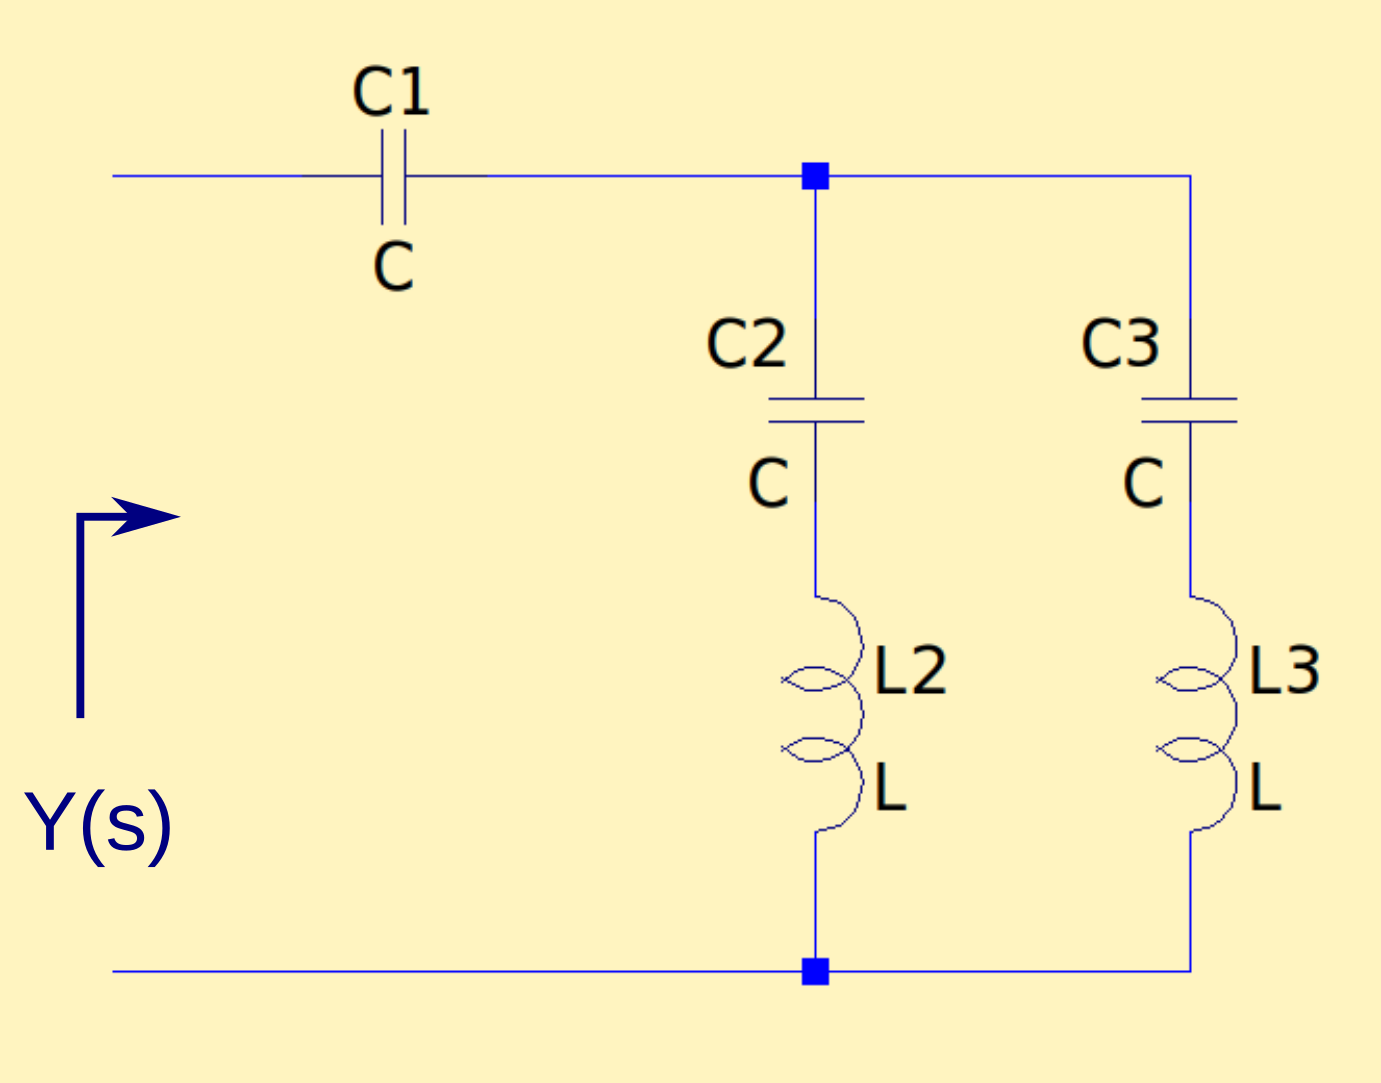

# Desarrollo analítico


In [2]:

from IPython.display import IFrame
IFrame("./TS9.pdf", width=1000, height=1000)

# Simulacion numérica

### Foster en derivación

In [3]:
import sympy as sp

# Importamos las funciones de PyTC2

from pytc2.sintesis_dipolo import foster
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

In [10]:
# Resolución simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
Y = (s**3 + 2*s) / (s**4 + 4*s**2 + 3)

print_latex(a_equal_b_latex_s('Y(s)', Y))

<IPython.core.display.Math object>

In [13]:
# Se expande FF a la Foster
k0, koo, ki_wi, _ , Y_foster = foster(Y)

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1 = \left[ \frac{1}{ \frac{1}{s. \frac{\omega_i^2}{2.k_i} } + s . \frac{1}{2.k_i} } \right]  = \
                                             \left[ \frac{1}{ \frac{k_0}{s} + s . k_\infty } \right] = \
                                             \left[ k_0, k_\infty \right] = \
                                       \left[ \
                                             \left[ \frac{\omega_1^2}{2k_1}, \frac{1}{2k_1} \right] \
                                       \right]', ki_wi ))

print_latex(a_equal_b_latex_s('k_\infty', koo))


print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y(s)', Y)[1:-1], Y_foster ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Foster derivación

<IPython.core.display.Math object>

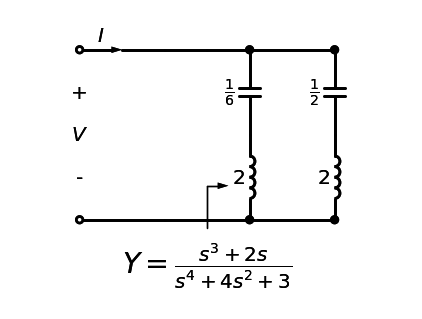

In [17]:
print_subtitle('Foster derivación')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y(s)', Y)[1:-1], Y_foster ))

# Tratamos a nuestra función imitancia como una Z
dibujar_foster_derivacion(k0, koo, ki_wi, y_exc = Y)

### Cauer 1 y 2

In [18]:
from pytc2.sintesis_dipolo import cauer_LC
from pytc2.dibujar import dibujar_cauer_LC


# Sea la siguiente función de excitación

Z = (s**4 + 4*s**2 + 3)/(s**3 + 2*s)

print_latex(a_equal_b_latex_s('Z(s)', Z))

<IPython.core.display.Math object>

#### Cauer 1: Remocion en infinito

<IPython.core.display.Math object>

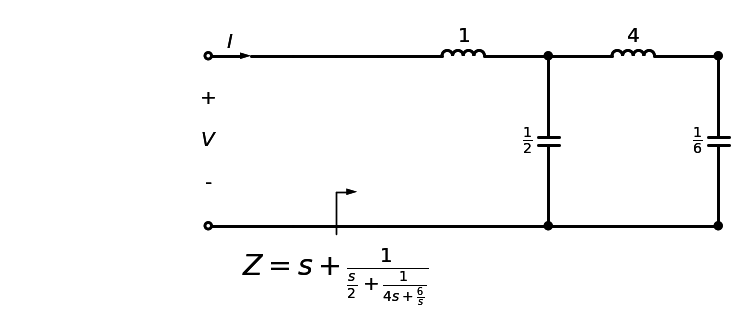

In [23]:
# Implementaremos Z mediante Cauer 1 o remociones continuas en infinito

print_subtitle('Cauer 1: Remocion en infinito')

koo, Z_cauer_oo, rem = cauer_LC(Z, remover_en_inf=True)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z(s)', Z)[1:-1], Z_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(koo, z_exc = Z_cauer_oo)


#### Cauer 2: Remoción en 0

<IPython.core.display.Math object>

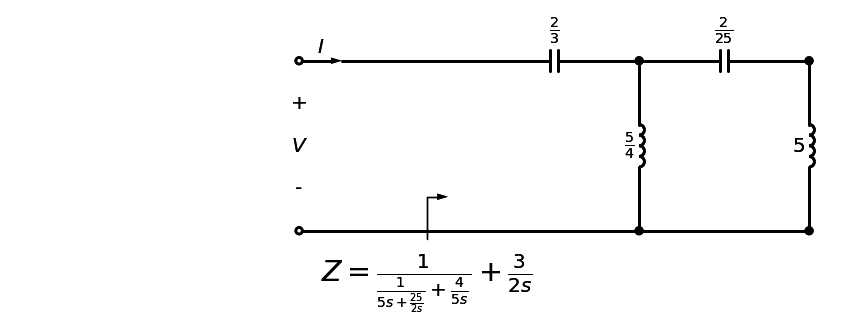

In [24]:
# Implementaremos F mediante Cauer 2 o remociones continuas en cero
k0, Z_cauer_0, rem = cauer_LC(Z, remover_en_inf=False)

print_subtitle('Cauer 2: Remoción en 0')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z(s)', Z)[1:-1], Z_cauer_0 ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(k0, z_exc = Z_cauer_0)


# Punto 2

In [26]:
import sympy as sp

# Funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

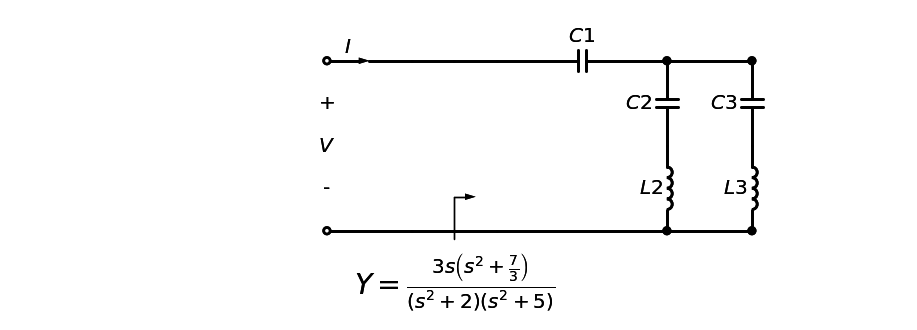

In [28]:
# Resolución simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
Y = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)

# Red ejemplo 1
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 Y, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Capacitor, 'C1')

d = dibujar_tanque_derivacion(d, 'L2', 'C2')

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, 'L3', 'C3')

display(d)

In [31]:
print_subtitle('Admitancia de entrada a la red')

print_latex(a_equal_b_latex_s('Y(s)', Y))

# calculamos polos y ceros de Y(s)
num, den = Y.as_numer_denom()


#### Admitancia de entrada a la red

<IPython.core.display.Math object>

In [32]:
# Restricción circuital: L2*C2 = 1 r/s
# remoción parcial en DC de 1/YY

omega_L2C2 = 1

Z2, Zc1 = remover_polo_dc(1/Y, omega_zero = omega_L2C2 )

# Yc1 es la admitancia removida
# extraigo C1
C1 = 1/(s*Zc1)

print_latex(a_equal_b_latex_s('Z_1(s) = \\frac{k^p_0}{s}', Zc1))
print_latex(a_equal_b_latex_s('Z_2(s)', Z2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [33]:
Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )

print_latex(a_equal_b_latex_s('Y_3(s)', Yt2))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
# quedaría solo un tanque en Y4, no especifico omega.
Y6, Yt3, L3, C3 = remover_polo_jw(Y4, isImpedance = False)

print_latex(a_equal_b_latex_s('Y_5(s)', Yt3))
print_latex(a_equal_b_latex_s('Y_6(s)', Y6))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

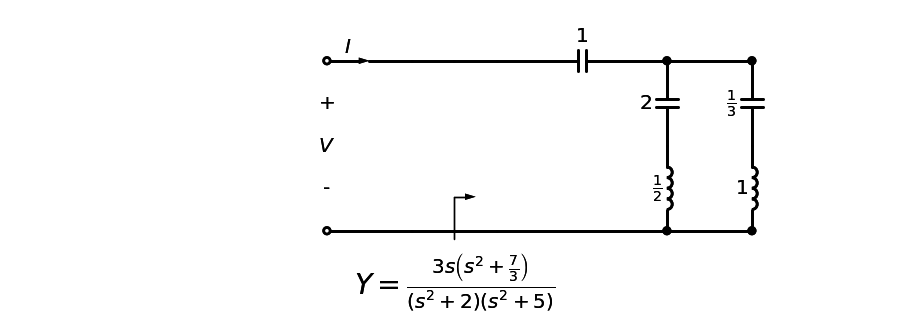

In [36]:
# Dibujamos la red resultante:

d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 Y, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Capacitor, C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, L3, C3)

display(d)